## Scipy optimize package

### Optimization

Selection of a best element with regard to some criteria from a set of available alternatives.In the simplest case, an optimization problem consists of minimizing or maximizing a real function by systematically choosing input values from within an allowed set and computing the value of the function.

An optimization problem can be represented in the following way:

Given a function f:A -> R

An element x0 belonging to A is sought such that f(x0) <= f(x) for all x belonging to A

The domain A of f is called the search space or the choice set, while the elements of A are called candidate solutions or feasible solutions.

### Constrained and Unconstrained Optimization

Optimizing some objective function with respect to some variables when some constraints are placed on those variables. Constraints can be hard and soft constraints. When a constraint is violated, a penalty term is added with soft constraints.

### Global and Local minima

Local optimum of an optimization problem is a solution that is optimal (either maximal or minimal) within a neighboring set of candidate solutions. This is in contrast to a global optimum, which is the optimal solution among all possible solutions, not just those in a particular neighborhood of values. 

### Convex Functions

A function f is convex if for any two points u, v in the domain of f:

    f((1 - t)u + tv) <= (1 - t)f(u) + tf(v) for all t belonging to [0,1] (0 <= t <= 1)
    
    
Convex functions have the property that local minima are also global minima. A function is strictly convex if there is no equality in the above constraint.

Geometrically,

    f(x2) - f(x1)          f(x3) - f(x1)            f(x3) - f(x2)
    ___________    <=      ______________    <=     ______________
    
     (x2 - x1)               (x3 - x1)               (x3 - x2)
     
     
A convex function is a continuous function whose value at the midpoint of every interval in its domain does not exceed the arithmetic mean of its values at the ends of the interval.   

If f(x) has a second derivative in [a,b], then a necessary and sufficient condition for it to be convex on that interval is that the second derivative f^('')(x)>=0 for all x in [a,b]. 
    

### Attributes of functions that affect which algorithm to choose to optimize

1) Number of dimensions 
<br>2) Whether they are continuous or not (for sufficiently small changes in input, the changes in output are arbitrarily small.)
<br>3) Whether they are differentiable or not (Possible to find gradient w.r.t the attribute we are optimizing on)
<br>4) Whether they are separable or not (A function of 2 independent variables is said to be separable if it can be expressed as a product of 2 functions, each of them depending on only one variable.) 
<br>5) Whether they have multiple peaks or not.
<br>6) Whether they are convex or not. 

Some sample test functions are listed at: http://benchmarkfcns.xyz/fcns


### Example Functions: Convex - x^2

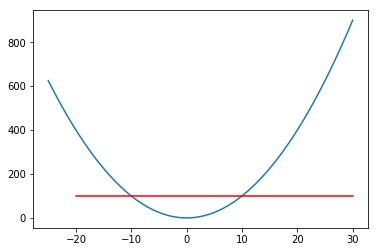

In [29]:
import numpy as np

x = np.linspace(-25, 30, 100)
y = [a**2 for a in x]

plt.plot(x,y)

x1 = np.linspace(-20,30,40)
y1 = [100]*40

plt.plot(x1,y1,'r-')


### Example Functions: Non-convex - Rosenbrock

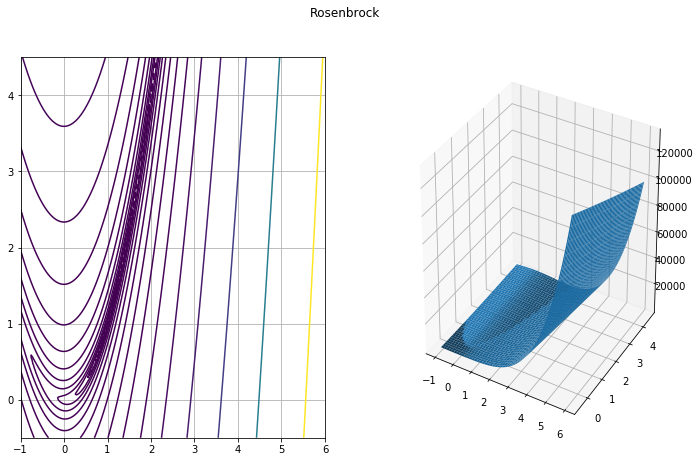

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
%matplotlib inline

a = 1
b = 100

x = np.linspace(-1, 6, 200)
y = np.linspace(-0.5, 4.5, 200) 

rosenbrockfunction = lambda x,y: (a-x)**2+b*(y-x**2)**2


X,Y = np.meshgrid(x, y)

Z = rosenbrockfunction(X,Y)

fig = plt.figure(figsize = (12,7))
fig.suptitle('Rosenbrock')

# 2d contour plot
ax = fig.add_subplot(1, 2, 1)

plt.contour(X, Y, Z, np.logspace(-1, 36, 100, base = 10))
ax.grid(True)


# 3d surface plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(X, Y, Z)


plt.show()



### Scalar univariate functions minimizers

Brent's method: Combination of bisection, secant and Inverse Quadratic Interpolation. 
Bisection Method: At each step the method divides the interval in two by computing the midpoint c = (a+b) / 2 of the interval and the value of the function f(c) at that point. Unless c is itself a root (which is very unlikely, but possible) there are now only two possibilities: either f(a) and f(c) have opposite signs and bracket a root, or f(c) and f(b) have opposite signs and bracket a root. Explicitly, if f(a) and f(c) have opposite signs, then the method sets c as the new value for b, and if f(b) and f(c) have opposite signs then the method sets c as the new a. In both cases, the new f(a) and f(b) have opposite signs, so the method is applicable to this smaller interval.

Secant Method: Starting with initial values x0 and x1, we construct a line through the points (x0, f(x0)) and (x1, f(x1)). ![title](img/secant1.png)
![title](img/secant2.png)
![title](img/secant3.png)

Inverse Quadratic Interpolation: We use the three preceding iterates, xn−2, xn−1 and xn, with their function values, fn−2, fn−1 and fn. Applying the Lagrange interpolation formula to do quadratic interpolation on the inverse of f yields                             
        
![title](img/iqi1.png)       

Brent's method:![title](img/brent1.png)


In computer science, the Fibonacci search technique is a method of searching a sorted array using a divide and conquer algorithm that narrows down possible locations with the aid of Fibonacci numbers. Compared to binary search where the sorted array is divided into two equal-sized parts, one of which is examined further, Fibonacci search divides the array into two parts that have sizes that are consecutive Fibonacci numbers. Let k be defined as an element in F, the array of Fibonacci numbers. n = Fm is the array size. If n is not a Fibonacci number, let Fm be the smallest number in F that is greater than n.

The array of Fibonacci numbers is defined where Fk+2 = Fk+1 + Fk, when k ≥ 0, F1 = 1, and F0 = 0.

Golden search: In mathematics, two quantities are in the golden ratio if their ratio is the same as the ratio of their sum to the larger of the two quantities. The algorithm maintains the function values for triples of points whose distances form a golden ratio.![title](img/golden1.png)
. The functional values of f(x) are on the vertical axis, and the horizontal axis is the x parameter. The value off(x) has already been evaluated at the three points: x1,x2,x3. Since f2 is smaller than either f1 or f3, it is clear that a minimum lies inside the interval from x1 to x3.

The next step in the minimization process is to "probe" the function by evaluating it at a new value of x, namely x4. It is most efficient to choose x4 somewhere inside the largest interval, i.e. between x2 and x3 . If the function yields f4a then a minimum lies between x1 and x4, and the new triplet of points will be x1, x2 and x4. However, if the function yields the value f4b  then a minimum lies between x2 and x3  and the new triplet of points will be x2, x4 and x3. Thus, in either case, we can construct a new narrower search interval that is guaranteed to contain the function's minimum. 


In [47]:
from scipy import optimize
import numpy as np

def fn(x):
    return np.sqrt(x - 2)

res = optimize.minimize_scalar(fn)
print(res.x)
print(res.success)

2.0000000329182535
True


/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [34]:
from scipy import optimize
import numpy as np

def fn(x):
    return -np.exp(-(x - 0.7)**2)

res = optimize.minimize_scalar(fn, bounds = [-1,1], tol = 1e-1, options={'maxiter': 500} )
print(res.x)
print(res.success)



0.6798374000099999
True


### Unconstrained minimization of multivariate scalar functions (minimize) - Nelder Mead Method

Theory: In the NM method, originally, a simplex, which is an n-dimensional polytope is initialized. The centroid for this simplex is calculated. Calculate the "reflected" centroid of the simplex. If the new centroid is better than the previous second worst, replace previous worst with new reflected simplex. If the reflected point is the best so far, calculate the "expanded" point. If the "expanded" point is better than the "reflected point",then obtain a new simplex by replacing the worst point with the expanded point go to step 1; else obtain a new simplex by replacing the worst point and go to step 1. If the "reflected" point is not better, compute "contracted" point and replace old worst with "contracted" point and go to step 1. Its also possible to shrink all points except the best.

It is a heursitic method used for solving multidimensional, non-differentiable problems.

In [27]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import rosen


x = np.linspace(0,2,5)
res = minimize(rosen, x, method = 'Nelder-Mead', options={'maxiter': 500, 'xtol': 1e-3, 'disp': True})
print(res.x)
print(res.message)

Optimization terminated successfully.
         Current function value: 3.947771
         Iterations: 178
         Function evaluations: 282
[1.10125419e-02 9.88834555e-03 1.03338833e-02 9.68967269e-03
 6.42408123e-05]
Optimization terminated successfully.


### Powell Method

In the case of the Powell method, an initial point is set and the set of basis vectors are used to find the direction of maximum decrease in value in value of the function and this direction is used in the next step or the average of P0 and PN are used to find the new direction. This process is iterated to get the minimum. Powell method is used to find the local minimum.

In [5]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import rosen


x = np.linspace(0,2,5)
res = minimize(rosen, x, method = 'Powell', options={'maxiter': 500, 'xtol': 1e-3, 'disp': True})
print(res.x)
print(res.message)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 2110
[1. 1. 1. 1. 1.]
Optimization terminated successfully.


### Conjugate Gradient Descent

Gradient Descent: The stationary point or minimum point, the derivative is 0. This method uses the gradient of the function and keeps moving in the direction of steepest descent until the minimum is found. xn+1 = xn - f'(x)

Newton Method: The direction in which the maximum of the second derivative occurs is the direction in which the algorithm moves: xn+1 = xn - H^-1f(x)

Conjugate Gradient Descent: A set of conjugate vectors piTApj = 0, where i != j. That is pi and Apj are orthogonal. The minima x* = x0 + a0p0 + a1p1 + ...+an-1pn-1. p0 is negative of gradient of f at x = x0 (initial guess). The conjugate vectors pk are pk = -rk + bpk-1 . If f is 1/2 Ax^2 -bx, then the residual is b - Ax. Since this residual is in the direction of negative gradient of x.

Nonlinear Conjugate Gradient: Extension of CG for non-linear or quadratic functions. The search direction is given as:
dk = -gk + bdk-1, where b = gkTgk / gk-1Tgk-1

Truncated Newton: For problems with a large number of variables, iterative techniques are used for obtaining a direction dk in a line-search method. These techniques are usually called truncated Newton methods because the iterative technique is stopped (truncated) as soon as a termination criterion is satisfied.

In [8]:
from scipy import optimize

def f(x):   #f(x) = (x + 3) (y - 1)^2
    return ((x[0] + 3) * (x[1] - 1)**2)

res = optimize.minimize(f, [2, -1], method="CG")    
print(res.success)
print(res.x)


True
[1.60000003 0.99999987]


In [14]:
from scipy import optimize

def f(x):  # 0.5 * (1 - x) ^2 + (y - x^2)^2
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2


def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

res = optimize.minimize(f, [2, 1], method="CG", jac=jacobian) 
print(res.success)
print(res.x)


True
[1.00000012 1.00000009]


In [15]:
from scipy import optimize

def f(x):  # 0.5 * (1 - x) ^2 + (y - x^2)^2
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2


def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

def hessian(x): 
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

res = optimize.minimize(f, [2, 1], method="Newton-CG", jac=jacobian, hess = hessian) 
print(res.success)
print(res.x)


True
[1.         0.99999999]


### Broyden–Fletcher–Goldfarb–Shanno algorithm (BFGS) and LBFGS

It is Quasi-Newton method, which approximates the Hessian based on differences of gradients over several iterations,
by imposing a "secant" (Quasi-Newton) condition (Bk+1 qk) = pk, where qk = xk+1 - xk, pk = f'(xk+1) - f'(x). The BFGS Hessian approximation can either be based on the full history of gradients, in which case it is referred to as BFGS, or it can be based only on the most recent m gradients, in which case it is known as limited memory BFGS, abbreviated as L-BFGS. The advantage of L-BFGS is that is requires only retaining the most recent m gradients, where m is usually around 10 to 20, which is a much smaller storage requirement than n*(n+1)/2 elements required to store the full (triangle) of a Hessian estimate, as in required with BFGS, where n is the problem dimension. Unlike (full) BFGS, the estimate of the Hessian is never explicitly formed or stored in L-BFGS; rather, the calculations which would be required with the estimate of the Hessian are accomplished without explicitly forming it. L-BFGS is used instead of BFGS for very large problems (when n is very large), but might not perform as well as BFGS. Therefore, BFGS is preferred over L-BFGS when the memory requirements of BFGS can be met. On the other hand, L-BFGS may not be much worse in performance than BFGS.

f'(k+1) - f'(k) ~= H (xk+1)(xk+1 - xk)

In [16]:
from scipy import optimize

def f(x):  # 0.5 * (1 - x) ^2 + (y - x^2)^2
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2


def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

res = optimize.minimize(f, [2, 1], method="BFGS", jac=jacobian) 
print(res.success)
print(res.x)


True
[1.00000151 1.00000348]


In [17]:
from scipy import optimize

def f(x):  # 0.5 * (1 - x) ^2 + (y - x^2)^2
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2


def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

res = optimize.minimize(f, [2, 1], method="L-BFGS-B", jac=jacobian) 
print(res.success)
print(res.x)

True
[0.99999956 0.99999765]


### Trust-Region Method

TRM
Trust-region method (TRM) is one of the most important numerical optimization methods in solving nonlinear programming (NLP) problems. It works in a way that first define a region around the current best solution, in which a certain model (usually a quadratic model) can to some extent approximate the original objective function. TRM then take a step forward according to the model depicts within the region. Unlike the line search methods, TRM usually determines the step size before the improving direction (or at the same time). If a notable decrease (our following discussion will based on minimization problems) is gained after the step forward, then the model is believed to be a good representation of the original objective function. If the improvement is too subtle or even a negative improvement is gained, then the model is not to be believed as a good representation of the original objective function within that region. The convergence can be ensured that the size of the “trust region” (usually defined by the radius in Euclidean norm) in each iteration would depend on the improvement previously made. 

COBYLA (Constrained Optimization by Linear Approximations): A simplex is constructed with one of its vertices being updated at each iteration such that the Euclidean distance between the new vertex and the best known point is less than a defined delta value. The vertex is modified which ensures that the volume of the updated simplex does not become 0. Powell's paper on it: http://www6.cityu.edu.hk/rcms/publications/preprint23.pdf

## Global (brute-force) optimization routines

### Basinhopping

Basin-hopping is a two-phase method that combines a global stepping algorithm with local minimization at each step. Designed to mimic the natural process of energy minimization of clusters of atoms, it works well for similar problems with “funnel-like, but rugged” energy landscapes.The algorithm is iterative with each cycle composed of the following features

   <br> 1.random perturbation of the coordinates
    <br> 2.local minimization
    <br> 3.accept or reject the new coordinates based on the minimized function value
    
For stochastic global optimization there is no way to determine if the true global minimum has actually been found. Instead, as a consistency check, the algorithm can be run from a number of different random starting points to ensure the lowest minimum found in each example has converged to the global minimum. For this reason basinhopping will by default simply run for the number of iterations niter and return the lowest minimum found. It is left to the user to ensure that this is in fact the global minimum.    


In [21]:
from scipy import optimize

def f(x):  # 0.5 * (1 - x) ^2 + (y - x^2)^2
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

res = optimize.basinhopping(f, [2, 1]) 
print(res)


                        fun: 2.442672457853135e-15
 lowest_optimization_result:       fun: 2.442672457853135e-15
 hess_inv: array([[0.99816469, 1.99513213],
       [1.99513213, 4.4863209 ]])
      jac: array([2.06789631e-08, 3.37986994e-09])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([0.99999993, 0.99999986])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4112
                        nit: 100
                       njev: 1028
                          x: array([0.99999993, 0.99999986])


### Differential Evolution

Finds the global minimum of a multivariate function. Differential Evolution is stochastic in nature (does not use gradient methods) to find the minimium, and can search large areas of candidate space, but often requires larger numbers of function evaluations than conventional gradient based techniques.

<br> Initialize all agents x with random positions in the search-space.
    <br> Until a termination criterion is met (e.g. number of iterations performed, or adequate fitness reached), repeat the following:
    <br>    For each agent x in the population do:
    <br>      Pick three agents a , b  and c from the population at random, they must be distinct from each other as well as from agent x 
    <br>       Pick a random index R ∈ { 1 , … , n } where n is the dimensionality of the problem being optimized.
    <br>       Compute the agent's potentially new position y = [ y 1 , … , y n ] as follows:
    <br>       For each i ∈ { 1 , … , n }, pick a uniformly distributed random number r i ∼ U ( 0 , 1 ) 
    <br>       If r i < C R or i = R then set y i = a i + F × ( b i − c i )  otherwise set y i = x i.
    <br>  The parameter CR ∈ [ 0 , 1 ] is called the crossover probability and the parameter F ∈ [ 0 , 2 ]  is called the differential weight, both these parameters must be set by the user along with the population size NP ≥ 4 and may greatly impact the optimization performance
    <br>       If f ( y ) < f ( x ) then replace the agent x in the population with the improved candidate solution y 
    Pick the agent from the population that has the best fitness and return it as the best found candidate solution.

In [24]:
from scipy import optimize

def f(x):  # 0.5 * (1 - x) ^2 + (y - x^2)^2
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

res = optimize.differential_evolution(f, bounds = [(-1,-1),(1,1)]) 
print(res)

     fun: 2.0
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 1
 success: True
       x: array([-1.,  1.])


Newton-Raphson Method
The Newton-Raphson method uses an iterative process to approach one root of a function. The specific root that the process locates depends on the initial, arbitrarily chosen x-value. 

xn+1 = xn - f(x) / f'(x)

The iteration is stopped when f(x) / f'(x) becomes close to 0.

In [33]:
from scipy import optimize

def f(x,y):  # 0.5 * (1 - x) ^2 + (y - x^2)^2
    return .5*(1 - x)**2 + (y - x**2)**2

x0 = .1
y = 1
res = optimize.newton(f, x0, args=(y,))
print(res)

1.0000000185546405


![title](img/algo1.png)

Given the function: z = f(a) + f(b) where, f(x) = 1 - exp(-x**2) + .01*x**2, and constraints 3 >= a,b >= -3, which family of algorithms does well? Why? 



### Additional Examples and Material

https://www.programcreek.com/python/example/57330/scipy.optimize.minimize

https://www.scipy-lectures.org/advanced/mathematical_optimization/#id41

https://www.scipy-lectures.org/packages/sympy.html#sympy

### Sources:
<br> Wikipedia
<br> https://www.scipy-lectures.org/advanced/mathematical_optimization/#id41
<br> https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf
<br> http://mathfaculty.fullerton.edu/mathews/n2003/powellmethod/PowellMethodProof.pdf
<br> http://docs.scipy.org
<br> https://www.ldeo.columbia.edu/~mspieg/e4300/BlankPDFs/Lecture06_blank.pdf
<br> https://www.scipy-lectures.org/advanced/mathematical_optimization/#id41